In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('./DATA/airline_tweets.csv')

In [3]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


<Axes: xlabel='airline_sentiment', ylabel='count'>

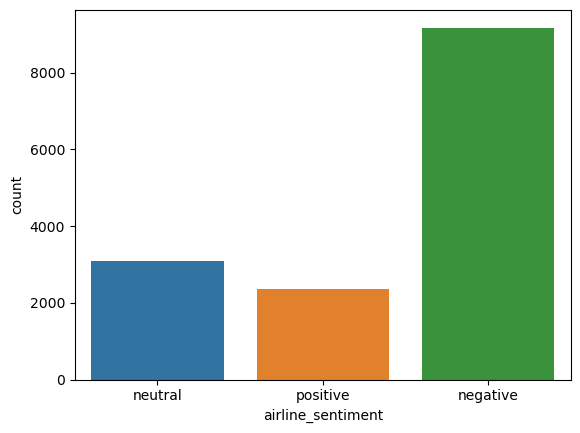

In [6]:
sns.countplot(data=df, x='airline_sentiment')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Bad Flight'),
  Text(1, 0, "Can't Tell"),
  Text(2, 0, 'Late Flight'),
  Text(3, 0, 'Customer Service Issue'),
  Text(4, 0, 'Flight Booking Problems'),
  Text(5, 0, 'Lost Luggage'),
  Text(6, 0, 'Flight Attendant Complaints'),
  Text(7, 0, 'Cancelled Flight'),
  Text(8, 0, 'Damaged Luggage'),
  Text(9, 0, 'longlines')])

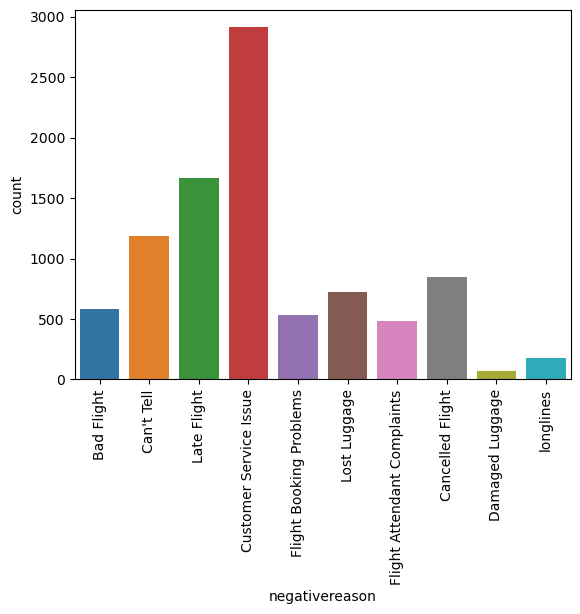

In [10]:
sns.countplot(data=df, x='negativereason')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Virgin America'),
  Text(1, 0, 'United'),
  Text(2, 0, 'Southwest'),
  Text(3, 0, 'Delta'),
  Text(4, 0, 'US Airways'),
  Text(5, 0, 'American')])

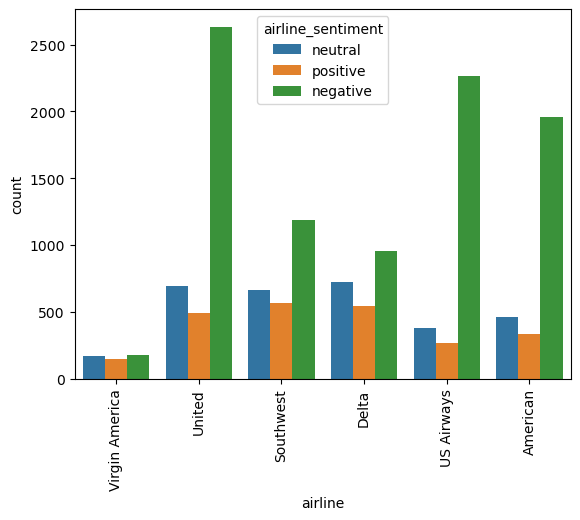

In [12]:
sns.countplot(data=df, x='airline', hue='airline_sentiment')
plt.xticks(rotation=90)

In [13]:
data=df[['airline_sentiment','text']]

In [14]:
data

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


In [15]:
X=data['text']
y=data['airline_sentiment']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=101)

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
tfidf=TfidfVectorizer(stop_words=['english'])

In [23]:
X_train_tfidf=tfidf.fit_transform(X_train)

In [24]:
X_test_tfidf=tfidf.transform(X_test)

In [25]:
from sklearn.naive_bayes import MultinomialNB

In [26]:
nb=MultinomialNB()

In [27]:
nb.fit(X_train_tfidf,y_train)

MultinomialNB()

In [28]:
from sklearn.linear_model import LogisticRegression

In [30]:
log_model=LogisticRegression(max_iter=1000)

In [31]:
log_model.fit(X_train_tfidf,y_train)

LogisticRegression(max_iter=1000)

In [32]:
from sklearn.svm import SVC, LinearSVC

In [33]:
rbf_svc=SVC()
rbf_svc.fit(X_train_tfidf,y_train)

SVC()

In [34]:
linear_svc=LinearSVC()
linear_svc.fit(X_train_tfidf,y_train)

LinearSVC()

In [45]:
from sklearn.metrics import confusion_matrix, classification_report

In [52]:
def report(model):
    preds=model.predict(X_test_tfidf)
    print(classification_report(y_test,preds))
    print(confusion_matrix(y_test,preds))

In [54]:
report(nb)

              precision    recall  f1-score   support

    negative       0.65      0.99      0.79      1817
     neutral       0.79      0.13      0.22       628
    positive       0.92      0.11      0.20       483

    accuracy                           0.66      2928
   macro avg       0.79      0.41      0.40      2928
weighted avg       0.73      0.66      0.57      2928

[[1807    9    1]
 [ 545   79    4]
 [ 416   12   55]]


In [55]:
report(log_model)

              precision    recall  f1-score   support

    negative       0.82      0.95      0.88      1817
     neutral       0.66      0.52      0.58       628
    positive       0.83      0.57      0.67       483

    accuracy                           0.79      2928
   macro avg       0.77      0.68      0.71      2928
weighted avg       0.79      0.79      0.78      2928

[[1720   82   15]
 [ 261  325   42]
 [ 126   82  275]]


In [57]:
report(rbf_svc)

              precision    recall  f1-score   support

    negative       0.80      0.95      0.87      1817
     neutral       0.68      0.48      0.56       628
    positive       0.83      0.56      0.67       483

    accuracy                           0.79      2928
   macro avg       0.77      0.67      0.70      2928
weighted avg       0.78      0.79      0.77      2928

[[1733   70   14]
 [ 286  302   40]
 [ 137   74  272]]


In [58]:
report(linear_svc)

              precision    recall  f1-score   support

    negative       0.85      0.91      0.87      1817
     neutral       0.63      0.57      0.60       628
    positive       0.78      0.66      0.72       483

    accuracy                           0.79      2928
   macro avg       0.75      0.71      0.73      2928
weighted avg       0.79      0.79      0.79      2928

[[1647  138   32]
 [ 211  360   57]
 [  91   73  319]]


In [59]:
from sklearn.pipeline import Pipeline

In [60]:
pipe = Pipeline([('tfidf',TfidfVectorizer()),
    ('svc',LinearSVC())])

In [61]:
pipe.fit(X,y)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [62]:
pipe.predict(['good flight'])

array(['positive'], dtype=object)

In [63]:
pipe.predict(['ok flight'])

array(['neutral'], dtype=object)

In [65]:
pipe.predict(['bad flight'])

array(['negative'], dtype=object)